## HomeWork 2

**Bakhshande 98522157**

### Q4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Q4.1

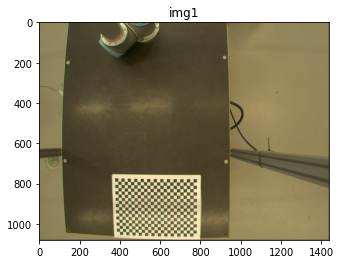

In [2]:
# path
path = r'images\img1.png'
  
image = cv2.imread(path, 1)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

plt.title("img1")
plt.imshow(image_RGB)

#### Q4.2

In [3]:
chess_board = (24, 17)

objp = np.zeros((chess_board[1]*chess_board[0], 3), np.float32)
objp[:,:2] = np.mgrid[0:chess_board[0], 0:chess_board[1]].T.reshape(-1, 2)

# Vector for 3D points
obj_points = []
 
# Vector for 2D points
img_points = []

flag, corners = cv2.findChessboardCorners(image_gray, chess_board, None)

#### Q4.3

In [4]:
# If desired number of corners can be detected then, 
# refine the pixel coordinates and display
# them on the images of checker board
if flag:
    
    winSize = (11, 11)
    zeroZone = (-1, -1)
    
    # stop the iteration when specified accuracy, epsilon, is reached or
    # specified number of iterations are completed.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    corners_show = cv2.cornerSubPix(image_gray, corners, winSize, zeroZone, criteria)
    
    corners = cv2.drawChessboardCorners(image, chess_board, corners_show, flag)
    
    obj_points.append(objp)
    img_points.append(corners_show)
    
    cv2.imwrite("images/ChessboardCorners.jpg", corners)
    corners_resized = cv2.resize(corners, (900, 650))
    cv2.imshow('corners', corners_resized)
    cv2.waitKey(0)

#### Q4.4

In [5]:
flag, matrix, distortion, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, image_gray.shape[::-1], None, None)

#### Q4.5

In [6]:
dist_coeffs = distortion[0]
print('k1 = ', dist_coeffs[0])
print('k2 = ', dist_coeffs[1])
print('p1 = ', dist_coeffs[2])
print('p2 = ', dist_coeffs[3])
print('k3 = ', dist_coeffs[4])

k1 =  -0.20625468220093468
k2 =  0.19895320011233164
p1 =  -0.0008226067017545929
p2 =  -0.016491390046288943
k3 =  -0.18016533311994923


#### Q4.6

In [7]:
new_image = cv2.imread('images\img5.png')
h,  w = new_image.shape[:2]
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))

# undistort
undistorted = cv2.undistort(new_image, matrix, distortion, None, new_camera_matrix)

# crop the image
x, y, w, h = roi
undistorted = undistorted[y:y+h, x:x+w]
cv2.imwrite("images/image5_undistorted_1.jpg", undistorted)

True

#### Q4.7

collect all to a function

In [8]:
def undistort_image(input_images, image_to_undistort):
    chess_board = (24, 17)

    objp = np.zeros((chess_board[1]*chess_board[0], 3), np.float32)
    objp[:,:2] = np.mgrid[0:chess_board[0], 0:chess_board[1]].T.reshape(-1, 2)

    # Vector for 3D points
    obj_points = []

    # Vector for 2D points
    img_points = []

    winSize = (11, 11)
    zeroZone = (-1, -1)

    # stop the iteration when specified accuracy, epsilon, is reached or
    # specified number of iterations are completed.
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    for input_image in input_images:
        image = cv2.imread(rf'images\{input_image}.png', 1)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )

        flag, corners = cv2.findChessboardCorners(image_gray, chess_board, None)

        # If desired number of corners can be detected then, 
        # refine the pixel coordinates and display
        # them on the images of checker board
        if flag:

            corners_show = cv2.cornerSubPix(image_gray, corners, winSize, zeroZone, criteria)

            corners = cv2.drawChessboardCorners(image, chess_board, corners_show, flag)

            obj_points.append(objp)
            img_points.append(corners_show)

            corners_resized = cv2.resize(corners, (900, 650))
            cv2.imshow('corners', corners_resized)
            cv2.waitKey(0)
    cv2.destroyAllWindows()

    flag, matrix, distortion, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, image_gray.shape[::-1], None, None)
    dist_coeffs = distortion[0]
    print('k1 = ', dist_coeffs[0])
    print('k2 = ', dist_coeffs[1])
    print('p1 = ', dist_coeffs[2])
    print('p2 = ', dist_coeffs[3])
    print('k3 = ', dist_coeffs[4])

    new_image = cv2.imread(rf'images\{image_to_undistort}.png')
    h,  w = new_image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(matrix, distortion, (w,h), 1, (w,h))

    # undistort
    undistorted = cv2.undistort(new_image, matrix, distortion, None, new_camera_matrix)

    # crop the image
    x, y, w, h = roi
    undistorted = undistorted[y:y+h, x:x+w]
    
    return undistorted

undistort image5.png using the function above

In [9]:
input_images = ['img1', 'img2', 'img3', 'img4']
image_to_undistort = 'img5'
undistorted_2 = undistort_image(input_images, image_to_undistort)
cv2.imwrite("images/image5_undistorted_2.jpg", undistorted_2)

k1 =  -0.3118552159472387
k2 =  0.24935640580276178
p1 =  -0.0018709406145173764
p2 =  0.009470339980000646
k3 =  -0.17159193623948688


True

undistort image5.png using just img1

In [10]:
input_images = ['img1']
image_to_undistort = 'img5'
undistorted_1 = undistort_image(input_images, image_to_undistort)
cv2.imwrite("images/image5_undistorted_1.jpg", undistorted_1)

k1 =  -0.20625468220093468
k2 =  0.19895320011233164
p1 =  -0.0008226067017545929
p2 =  -0.016491390046288943
k3 =  -0.18016533311994923


True